In [26]:
import pickle
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from dlc_practical_prologue import *
from projet1_helpers import *
import weight_sharing

%load_ext autoreload
%autoreload 2

# for plotting
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import seaborn as sns
sns.set()


> 0 if first > second else 1

## Weight Sharing

Use simamiese newtwork and weight sharing for prediction. The Network predicts a single digit per image and we compare the image by subtracting the second by the first and taking the sigmoid of the result. The loss is then computed on this value. TODO: add the comparaison in the convnet, look at what is the most misclassified

In [35]:
with open(f'data.p', 'rb') as f:
    train_input, train_target, train_classes,val_input,test_input,val_target,test_target,val_classes,test_classes = pickle.load(f)

In [41]:
torch.manual_seed(42)
losses, losses_val, accuracies_train, accuracies_test, accuracies_val,all_classified,misclassified  = weight_sharing.train_all(train_input, train_target, 
                                                                                            train_classes,val_input,
                                                                                            val_target, val_classes, 
                                                                                            test_input, test_target, test_classes)

--------------------------------------------------  
 Iteration 0 
 
Training accuracy is 0.977 
Validation accuracy is 0.856 
--------------------------------------------------  
 Iteration 1 
 
Training accuracy is 0.957 
Validation accuracy is 0.83 
--------------------------------------------------  
 Iteration 2 
 
Training accuracy is 0.969 
Validation accuracy is 0.85 
--------------------------------------------------  
 Iteration 3 
 
Training accuracy is 0.979 
Validation accuracy is 0.858 
--------------------------------------------------  
 Iteration 4 
 
Training accuracy is 0.972 
Validation accuracy is 0.854 
--------------------------------------------------  
 Iteration 5 
 
Training accuracy is 0.974 
Validation accuracy is 0.844 
--------------------------------------------------  
 Iteration 6 
 
Training accuracy is 0.971 
Validation accuracy is 0.862 
--------------------------------------------------  
 Iteration 7 
 
Training accuracy is 0.967 
Validation accur

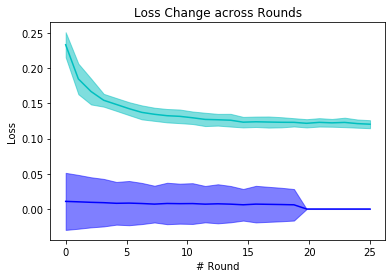

In [42]:
plt.figure()
plotloss((losses_train/(train_input.size(0)/mini_batch_size)).T,color= 'b')
plotloss(losses_val.T,color= 'c')
plt.show()

### Evaluation of model performance

In [50]:
accs_train = torch.Tensor(accuracies_train)
print(f"The training accuracy of the model is {accs_train.mean():.4f} ± {accs_train.var():.4f} ")

The training accuracy of the model is 0.9717 ± 0.0001 


In [51]:
accs_val = torch.Tensor(accuracies_val)
print(f"The test accuracy of the model is {accs_val.mean():.4f} ± {accs_val.var():.4f} ")

The test accuracy of the model is 0.8520 ± 0.0001 


In [52]:
accs_test = torch.Tensor(accuracies_test)
print(f"The test accuracy of the model is {accs_test.mean():.4f} ± {accs_test.var():.4f} ")

The test accuracy of the model is 0.8655 ± 0.0002 


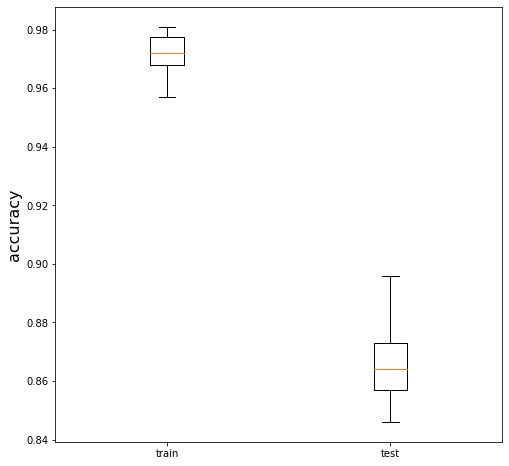

In [53]:
plot_performance(accuracies_train,accuracies_test)

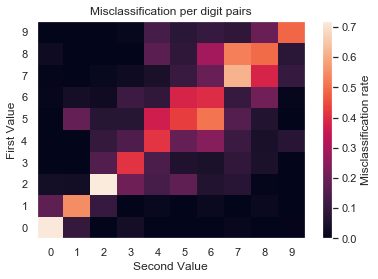

In [75]:
all_classified = np.stack(all_classified)
misclassified = np.stack(misclassified)
heat_map,fig = plot_heatmap(misclassified,all_classified)

In [76]:
fig.savefig('Plots/single_predicition_heatmap.png', bbox_inches='tight')

In [55]:
with open(f'produced/regression_accuracy.p', 'wb') as f:
    pickle.dump(accuracies_test ,f)

In [56]:
with open(f'produced/regression_heatmap.p', 'wb') as f:
    pickle.dump(heat_map ,f)